In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from IPython import display

# Juego de la vida

In [15]:
"""
  Parametros del juego
"""
n = 80 # el tamaño del espacio es nxn
generaciones = 1050 # num de veces que itera el juego


In [16]:
"""
  Espacio
"""
espacio = np.zeros((n, n), dtype=int)
print(espacio)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
#añadir elementos al espacio

espacio[1, 1:4] = 1
espacio[2,2] = 1
print(espacio)

[[0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
def vecindario(b):
    """Array de células vivas en el vecindario."""
    vecindario = (
        np.roll(np.roll(b, 1, 1), 1, 0) +  # Abajo-derecha
        np.roll(b, 1, 0) +  # Abajo
        np.roll(np.roll(b, -1, 1), 1, 0) +  # Abajo-izquierda
        np.roll(b, -1, 1) +  # Izquierda
        np.roll(np.roll(b, -1, 1), -1, 0) +  # Arriba-izquierda
        np.roll(b, -1, 0) +  # Arriba
        np.roll(np.roll(b, 1, 1), -1, 0) +  # Arriba-derecha
        np.roll(b, 1, 1)  # Derecha
    )
    return vecindario

In [19]:
print(vecindario(espacio))

[[1 2 3 ... 0 0 0]
 [1 2 3 ... 0 0 0]
 [1 3 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
def regla(b, B, S):
    """
      Apliacion de las reglas del juego de la vida
      1.- Nace si el numero de sus vecinos esta en B
      2.- Sigue viva si el numero de sus vecinos esta en S
    """
    v = vecindario(b)
    buffer_b = b.copy()  # Hacemos una copia de la matriz
    
    for i in range(buffer_b.shape[0]):
        for j in range(buffer_b.shape[1]):
            # nace si el conjunto de vecinos esta en B
            if (b[i, j] == 0) and (v[i, j] in B):
              #print(b[i,j], i, j)
              buffer_b[i, j] = 1
            #sigue viva si el conjunto de vecinos esta en S
            elif (b[i, j] == 1) and (v[i, j] in S):
                buffer_b[i, j] = 1
            else:
                buffer_b[i, j] = 0
    return buffer_b

In [21]:
regla(espacio, [3], [2,3])

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
#generacion 1
regla(espacio, [3], [2,3])

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
#generacion 2
regla(regla(espacio, [3], [2,3]), [3], [2,3])

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
def animate(i):
    b = imagen.get_array()
    #print(b)
    b = regla(b, [3], [2,3])
    #print(regla(b, [3], [2,3]))
    imagen.set_array(b)
    #print(imagen)
    return [imagen]

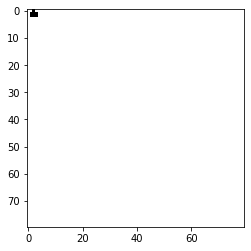

In [25]:
# crear figura
fig, ax = plt.subplots()

imagen = ax.imshow(espacio, interpolation="none", cmap='binary')
anim = animation.FuncAnimation(fig, animate, frames=1000, interval=1000/24, blit=False)

In [26]:
display.display_html(anim.to_jshtml(), raw=True)

Once 
 
 Loop 
 
 Reflect